# 2023 Layoffs in US 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data Exploration 

In [2]:
df = pd.read_csv('layoffs_data.csv')

In [3]:
df.info()
print('\nDataframe shape: {}'.format(df.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     2192 non-null   object 
 1   Location_HQ                 2192 non-null   object 
 2   Industry                    2192 non-null   object 
 3   Percentage                  1470 non-null   float64
 4   Date                        2192 non-null   object 
 5   Source                      2192 non-null   object 
 6   Funds_Raised                2002 non-null   float64
 7   Stage                       2192 non-null   object 
 8   Date_Added                  2192 non-null   object 
 9   Country                     2192 non-null   object 
 10  Laid_Off_Count              1507 non-null   float64
 11  List_of_Employees_Laid_Off  2191 non-null   object 
dtypes: float64(3), object(9)
memory usage: 205.6+ KB

Dataframe shape: (2192, 12)


In [4]:
df.head()
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

In [5]:
df.isna().sum()

Company                         0
Location_HQ                     0
Industry                        0
Percentage                    722
Date                            0
Source                          0
Funds_Raised                  190
Stage                           0
Date_Added                      0
Country                         0
Laid_Off_Count                685
List_of_Employees_Laid_Off      1
dtype: int64

In [6]:
df.describe()

,Percentage,Funds_Raised,Laid_Off_Count
count,1470.000000,2002.000000,1507.000000
mean,0.260121,823.342805,233.652953
std,0.255922,5772.854417,765.171737
min,0.000000,0.000000,3.000000
25%,0.100000,47.000000,35.000000
50%,0.170000,151.000000,75.000000
75%,0.300000,423.000000,160.000000
max,1.000000,121900.000000,12000.000000


# Feature Engineering
Create new column with layoff year

In [7]:
def get_date_year_month():
    '''For every date in Date column,
    extract year and month'''
    year_list = []
    month_list = []
    for date in df['Date']:
        year = date[0:4]
        month = date[5:7]
        year_list.append(year)
        month_list.append(month)
    
    return year_list, month_list

In [8]:
year_list, month_list = get_date_year_month()

#create new column
df['laid_year'] = year_list
df['laid_month'] = month_list
df.head()

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off,laid_year,laid_month
0,Openpay,Melbourne,Finance,1.00,2023-02-07 00:00:00,https://www.9news.com.au/finance/openpay-buy-n...,299.0,Post-IPO,2023-02-07 03:58:28,Australia,NaN,Unknown,2023,02
1,Dell,Austin,Hardware,0.05,2023-02-06 00:00:00,https://www.bloomberg.com/news/articles/2023-0...,NaN,Post-IPO,2023-02-06 15:48:37,United States,6650.0,Unknown,2023,02
2,Loggi,Sao Paulo,Logistics,0.07,2023-02-06 00:00:00,https://www.infomoney.com.br/negocios/pela-seg...,507.0,Series F,2023-02-07 03:45:59,Brazil,300.0,Unknown,2023,02
3,Drift,Boston,Marketing,NaN,2023-02-06 00:00:00,https://www.bizjournals.com/boston/news/2023/0...,107.0,Acquired,2023-02-07 03:56:03,United States,59.0,Unknown,2023,02
4,Pocket Aces,Mumbai,Media,0.25,2023-02-06 00:00:00,https://economictimes.indiatimes.com/tech/star...,19.0,Unknown,2023-02-06 19:12:45,India,50.0,Unknown,2023,02


# Data Cleaning 

Remove columns and drop with NaN values

In [9]:
# drop columns
df.drop(['Percentage',
         'Source',
         'Funds_Raised',
         'Stage',
         'Date_Added',
         'List_of_Employees_Laid_Off'],
         axis = 1,
         inplace = True
        )

In [10]:
# drop rows with NaN value
df = df[df['Laid_Off_Count'].notna()]

In [11]:
df.head()

,Company,Location_HQ,Industry,Date,Country,Laid_Off_Count,laid_year,laid_month
1,Dell,Austin,Hardware,2023-02-06 00:00:00,United States,6650.0,2023,02
2,Loggi,Sao Paulo,Logistics,2023-02-06 00:00:00,Brazil,300.0,2023,02
3,Drift,Boston,Marketing,2023-02-06 00:00:00,United States,59.0,2023,02
4,Pocket Aces,Mumbai,Media,2023-02-06 00:00:00,India,50.0,2023,02
5,Clari,SF Bay Area,Sales,2023-02-06 00:00:00,United States,20.0,2023,02


# Data Analytics 

### Total layoffs by year

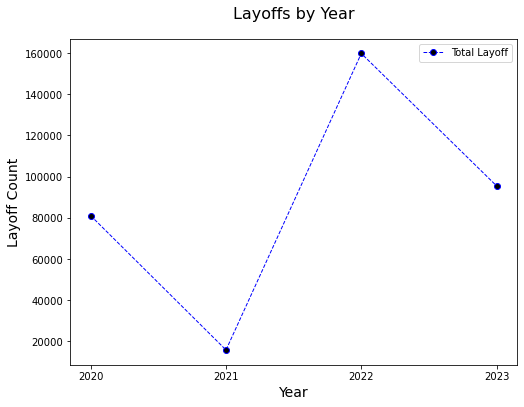

In [12]:
def standard_plot(x,y,labels,title,legend):
    
    plt.figure(figsize = (8,6))
    
    plt.plot(x,y,
            marker = 'o',
            linestyle = '--',
            linewidth = 1,
            color = 'b',
            markerfacecolor = 'k',
            markersize = 6,
            )
    plt.xlabel(labels[0], fontsize = 14)
    plt.ylabel(labels[1], fontsize = 14)
    plt.title(title,fontsize = 16,pad = 20)
    plt.legend(legend)

data = df.groupby('laid_year', as_index = False).sum()
x = data['laid_year']
y = data['Laid_Off_Count']
labels = ['Year','Layoff Count']
title = 'Layoffs by Year'
legend = ['Total Layoff']
standard_plot(x,y,labels,title,legend)

### Percentage layoffs by year and country 

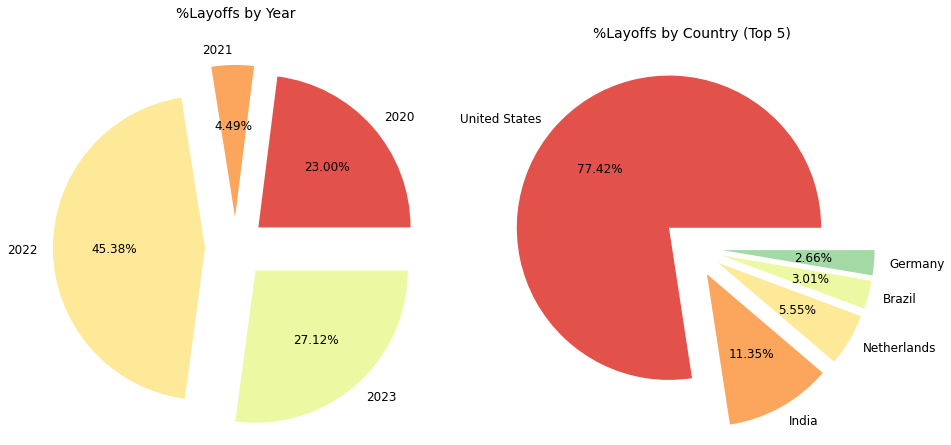

In [13]:
def pie_plot(data,x,labels,title):
    plt.pie(x,
           labels = labels,
           autopct='%1.2f%%',
           colors = sns.color_palette('Spectral'),
           textprops={'fontsize':12},
           explode = (0.2,0.2,0.2,0.2)
           )
    plt.title(title,fontdict={"fontsize":14},pad=40)
    
def pie_plot1(data,x,labels,title,legend):
    plt.pie(x,
           labels = labels,
           autopct='%1.2f%%',
           colors = sns.color_palette('Spectral'),
           textprops={'fontsize':12},
           explode = (0.2,0.2,0.2,0.2,0.2)
           )
    
    plt.title(title,fontdict={"fontsize":14},pad=20)
    #plt.legend(legend,loc = 'center left',bbox_to_anchor=(-0.3, .5))
    
    
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
x = list(data['Laid_Off_Count'])
labels = data['laid_year']
title = '%Layoffs by Year'
pie_plot(data,x,labels,title)

data = df.groupby('Country', as_index = False).sum()
data = data.sort_values(by = 'Laid_Off_Count',ascending = False)
plt.subplot(1,2,2)
x = list(data['Laid_Off_Count'][0:5])
labels = data['Country'][0:5]
legend = x
title = '%Layoffs by Country (Top 5)'
pie_plot1(data,x,labels,title,legend)



### Layoffs by company 

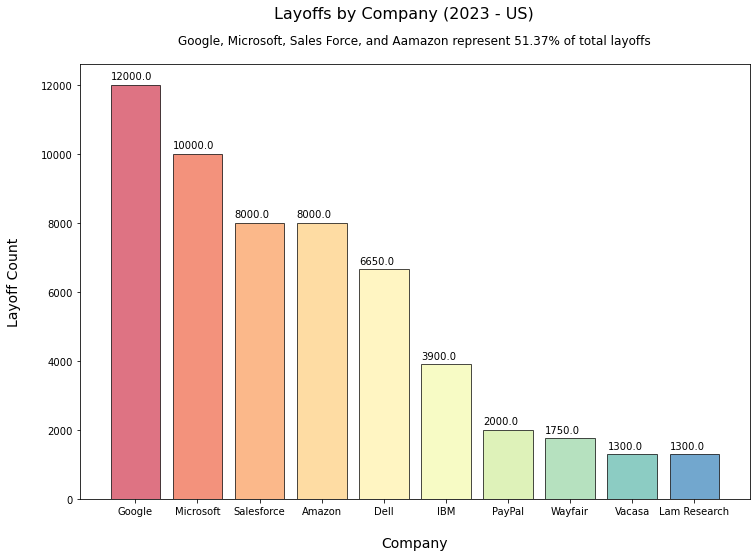

In [14]:
# Bar plot of biggest layoffs by companies in US in 2023
data = df[(df['Country'] == 'United States') & (df['laid_year'] == '2023')] 
data = data.sort_values(by = 'Laid_Off_Count',ascending = False)
data.head()

def bar_plot(x_labels,values,labels,title,suptitle,legend):
    
    plt.figure(figsize = (12,8))

    bars = plt.bar(x_labels,
           values,
           alpha = 0.7,
           color = sns.color_palette("Spectral", len(x_labels)),
           edgecolor = 'black'
           )
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + 150, yval)
    
    plt.title(title, fontdict={"fontsize":12},pad=20)
    plt.suptitle(suptitle, fontsize = 16)
    #plt.legend(legend, fontsize = 13)
    plt.xlabel(labels[0], fontsize = 14,labelpad = 20)
    plt.ylabel(labels[1],fontsize = 14, labelpad = 20)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
        
total_sum = data['Laid_Off_Count'].sum()
top_sum =  data['Laid_Off_Count'][0:4].sum()
percentage = (top_sum/total_sum)*100
    
values = list(data['Laid_Off_Count'][0:10])
x_labels = data['Company'][0:10]
labels = ['Company','Layoff Count']
legend = ['Layoff']
suptitle = 'Layoffs by Company (2023 - US)'
title = ('Google, Microsoft, Sales Force, and Aamazon represent {}% of total layoffs'.format(round(percentage,2)))
bar_plot(x_labels,values,labels,title,suptitle,legend)


### Layoffs by Industry

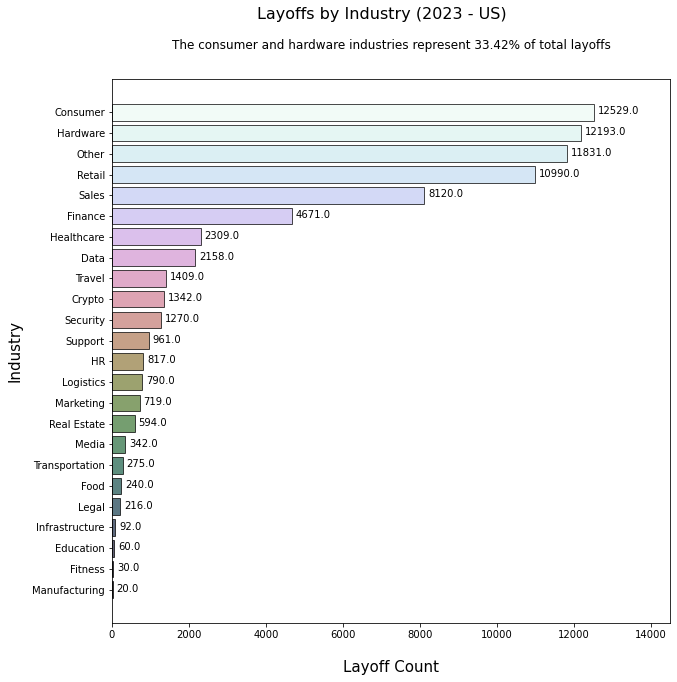

In [15]:
data = df[(df['Country'] == 'United States') & (df['laid_year'] == '2023')] 
data = data.groupby('Industry', as_index = False).sum()
data = data.sort_values(by = 'Laid_Off_Count',ascending = True)

values = list(data['Laid_Off_Count'])
x_labels = data['Industry']


def barh_plot(x_labels,values,labels,title,suptitle,legend):
    
    plt.figure(figsize = (10,10))
    my_cmap = plt.get_cmap("cubehelix")

    bars = plt.barh(x_labels,
           values,
           alpha = 0.7,
           color = sns.color_palette("cubehelix", len(x_labels)),
           edgecolor = 'black'
           )
    
    for i, v in enumerate(values):
        plt.text(v + 100, i -0.1 , str(v), color='black')
    
    plt.title(title, fontdict={"fontsize":12},pad=30)
    plt.suptitle(suptitle, fontsize = 16)
    #plt.legend(legend, fontsize = 13)
    plt.xlabel(labels[0], fontsize = 15,labelpad = 20)
    plt.ylabel(labels[1],fontsize = 15, labelpad = 10)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlim([0, 14500])

data = data.sort_values(by = 'Laid_Off_Count',ascending = False)
total_sum = data['Laid_Off_Count'].sum()
top_sum =  data['Laid_Off_Count'][0:2].sum()
percentage = (top_sum/total_sum)*100

labels = ['Layoff Count','Industry']
legend = ['']
suptitle = 'Layoffs by Industry (2023 - US)'
title = ('The consumer and hardware industries represent {}% of total layoffs'.format(round(percentage,2)))
barh_plot(x_labels,values,labels,title,suptitle,legend)

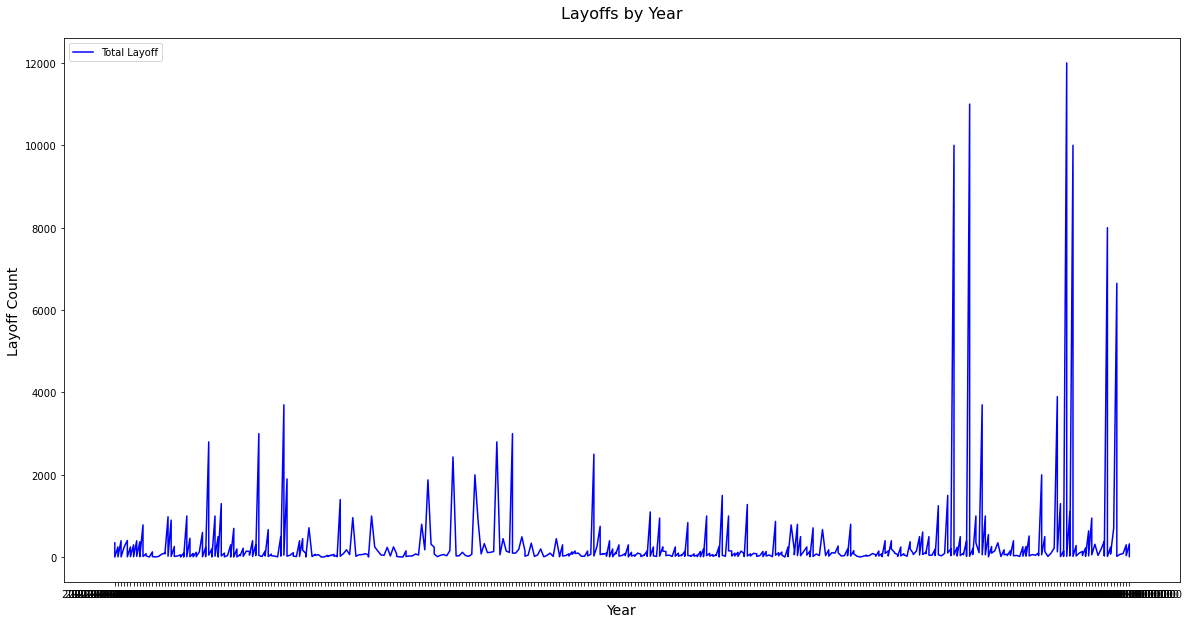

In [16]:
data = df[(df['Country'] == 'United States')] 
data = data.sort_values(by = ['laid_year','laid_month'],ascending = True)

def standard_plot(x,y,labels,title,legend):
    
    plt.figure(figsize = (20,10))
    
    plt.plot(x,y,
            #marker = 'o',
            linestyle = '-',
            linewidth = 1.5,
            color = 'b',
            #markerfacecolor = 'k',
            #markersize = 6,
            )
    plt.xlabel(labels[0], fontsize = 14)
    plt.ylabel(labels[1], fontsize = 14)
    plt.title(title,fontsize = 16,pad = 20)
    plt.legend(legend,loc='upper left')

x = data['Date']
y = data['Laid_Off_Count']
labels = ['Year','Layoff Count']
title = 'Layoffs by Year'
legend = ['Total Layoff']
standard_plot(x,y,labels,title,legend)

### Layoffs by Industry - Brazil

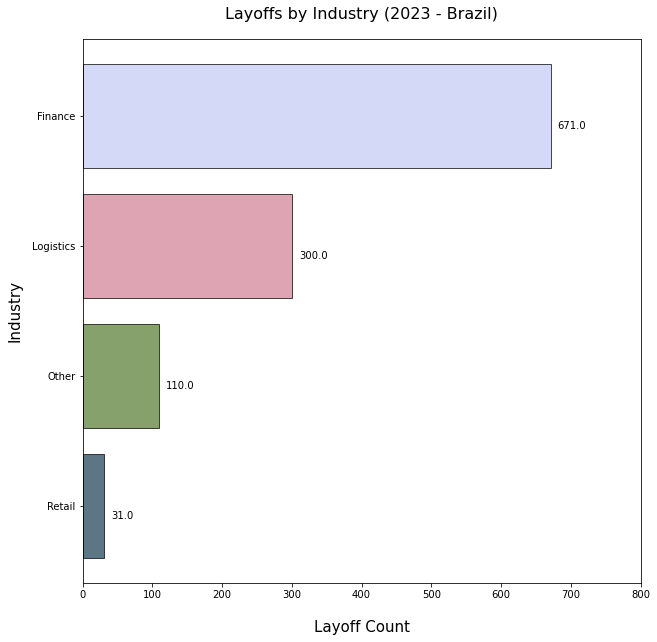

In [17]:
data = df[(df['Country'] == 'Brazil') & (df['laid_year'] == '2023')] 
data = data.groupby('Industry', as_index = False).sum()
data = data.sort_values(by = 'Laid_Off_Count',ascending = True)
data.head()

def barh_plot(x_labels,values,labels,title,legend):
    
    plt.figure(figsize = (10,10))
    my_cmap = plt.get_cmap("cubehelix")

    bars = plt.barh(x_labels,
           values,
           alpha = 0.7,
           color = sns.color_palette("cubehelix", len(x_labels)),
           edgecolor = 'black'
           )
    
    for i, v in enumerate(values):
        plt.text(v + 10, i -0.1 , str(v), color='black')
    
    plt.title(title, fontdict={"fontsize":16},pad=20)
    #plt.legend(legend, fontsize = 13)
    plt.xlabel(labels[0], fontsize = 15,labelpad = 20)
    plt.ylabel(labels[1],fontsize = 15, labelpad = 10)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlim([0, 800])

    
values = list(data['Laid_Off_Count'])
x_labels = data['Industry']
labels = ['Layoff Count','Industry']
legend = ['']
title = 'Layoffs by Industry (2023 - Brazil)'
barh_plot(x_labels,values,labels,title,legend)


### Layoffs by company - Brazil 

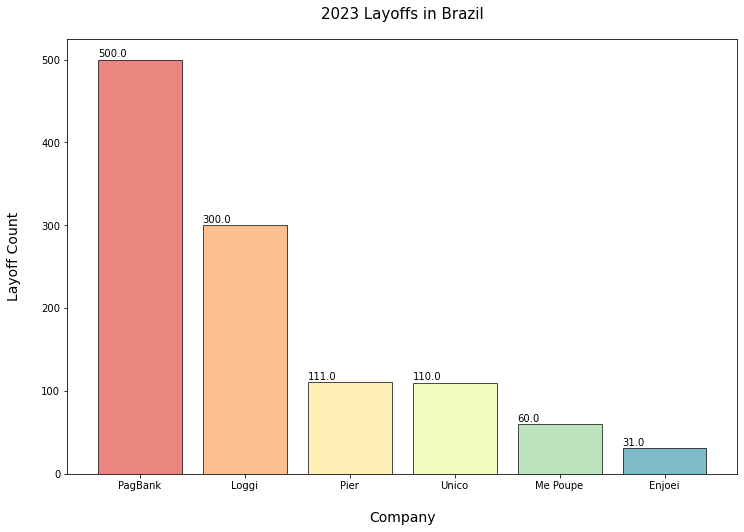

In [18]:
# Bar plot of biggest layoffs by companies in US in 2023
data = df[(df['Country'] == 'Brazil') & (df['laid_year'] == '2023')] 
data = data.sort_values(by = 'Laid_Off_Count',ascending = False)
data.head()

def bar_plot(x_labels,values,labels,title,legend):
    
    plt.figure(figsize = (12,8))
    my_cmap = plt.get_cmap("cubehelix")

    bars = plt.bar(x_labels,
           values,
           alpha = 0.7,
           color = sns.color_palette("Spectral", len(x_labels)),
           edgecolor = 'black'
           )
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x(), yval + 3, yval)
    
    plt.title(title, fontdict={"fontsize":15},pad=20)
    #plt.legend(legend, fontsize = 13)
    plt.xlabel(labels[0], fontsize = 14,labelpad = 20)
    plt.ylabel(labels[1],fontsize = 14, labelpad = 20)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

    
values = list(data['Laid_Off_Count'][0:10])
x_labels = data['Company'][0:10]
labels = ['Company','Layoff Count']
legend = ['']
title = '2023 Layoffs in Brazil'
bar_plot(x_labels,values,labels,title,legend)